In [1]:
from google.colab import files

# This will open a file selection dialog in your browser
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving ethicaldilemma.csv to ethicaldilemma.csv
User uploaded file "ethicaldilemma.csv" with length 17300323 bytes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data – adjust the filename or path as needed
df = pd.read_csv("ethicaldilemma.csv")   # or your actual file name

# (Optional) quick sanity check
print(df.shape)
print(df.columns[:20])

(100000, 41)
Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand'],
      dtype='object')


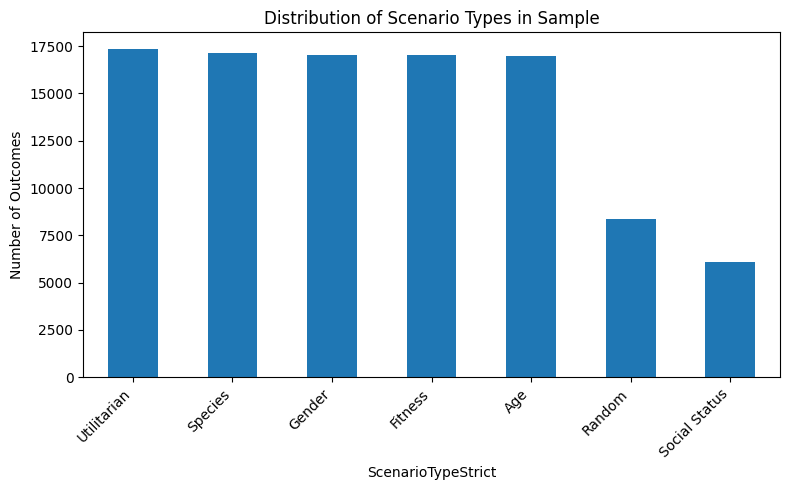

In [3]:
scenario_counts = df["ScenarioTypeStrict"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
scenario_counts.plot(kind="bar")
plt.title("Distribution of Scenario Types in Sample")
plt.xlabel("ScenarioTypeStrict")
plt.ylabel("Number of Outcomes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

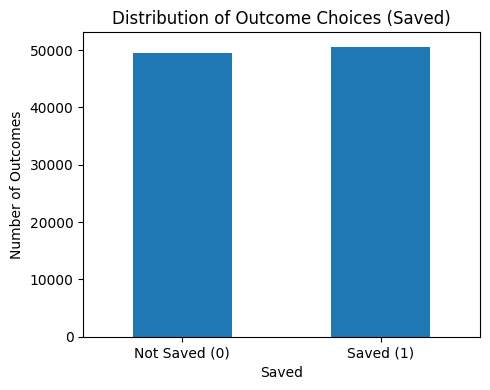

In [4]:
# Saved variable distribution
saved_counts = df["Saved"].value_counts().sort_index()

plt.figure(figsize=(5,4))
saved_counts.plot(kind="bar")
plt.title("Distribution of Outcome Choices (Saved)")
plt.xlabel("Saved")
plt.ylabel("Number of Outcomes")
plt.xticks([0,1], ["Not Saved (0)", "Saved (1)"], rotation=0)
plt.tight_layout()
plt.show()

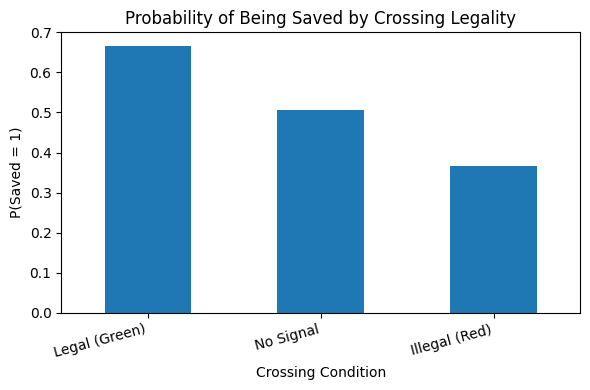

In [5]:
# Map CrossingSignal codes to labels
crossing_map = {0: "No Signal", 1: "Legal (Green)", 2: "Illegal (Red)"}
df["CrossingLabel"] = df["CrossingSignal"].map(crossing_map)

# Probability of being saved by crossing legality
saved_rate_by_crossing = df.groupby("CrossingLabel")["Saved"].mean().reindex(
    ["Legal (Green)", "No Signal", "Illegal (Red)"]
)

plt.figure(figsize=(6,4))
saved_rate_by_crossing.plot(kind="bar")
plt.title("Probability of Being Saved by Crossing Legality")
plt.xlabel("Crossing Condition")
plt.ylabel("P(Saved = 1)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

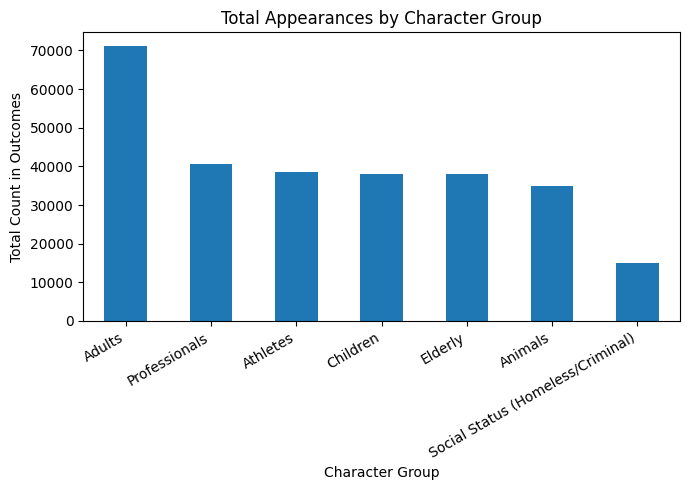

In [6]:
# Character columns from your data dictionary
char_cols = [
    "Man", "Woman", "Pregnant", "Stroller",
    "OldMan", "OldWoman",
    "Boy", "Girl",
    "Homeless",
    "LargeWoman", "LargeMan",
    "Criminal",
    "MaleExecutive", "FemaleExecutive",
    "FemaleAthlete", "MaleAthlete",
    "FemaleDoctor", "MaleDoctor",
    "Dog", "Cat"
]

# Aggregate into conceptual groups
char_groups = pd.DataFrame({
    "Children": df["Boy"] + df["Girl"] + df["Stroller"],
    "Adults": df["Man"] + df["Woman"] + df["Pregnant"],
    "Elderly": df["OldMan"] + df["OldWoman"],
    "Professionals": df["FemaleDoctor"] + df["MaleDoctor"] +
                     df["MaleExecutive"] + df["FemaleExecutive"],
    "Athletes": df["FemaleAthlete"] + df["MaleAthlete"],
    "Social Status (Homeless/Criminal)": df["Homeless"] + df["Criminal"],
    "Animals": df["Dog"] + df["Cat"]
})

group_totals = char_groups.sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
group_totals.plot(kind="bar")
plt.title("Total Appearances by Character Group")
plt.xlabel("Character Group")
plt.ylabel("Total Count in Outcomes")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()